# <font color='green'><b> Clustering </b></font>

!pip3 install scikit-learn

In [2]:
#@title ▶️ Base dir setup
import os, sys

# check if hosted (Google VM) or running on local server
if 'google.colab' in sys.modules:
  #@markdown Google Drive root folder - hosted by Google VM (adapt to your local paths)
  from google.colab import drive
  drive.mount('/content/drive', force_remount=False)
  base_dir = 'infoMM/' #@param {type: "string"}
  base_dir  = os.path.join('/content/drive/MyDrive/', base_dir)
  #!pip install pillow  --upgrade
  img_dir = 'data/img/'
  vid_dir = 'data/video/'
  out_dir = 'output/'
  
  # move to base_dir 
  os.chdir(base_dir)
else:
  #@markdown Path to local folder on PC (adapt to your local paths)
  img_dir = '../Immagini_IN/'
  out_dir = '../Immagin_OUT/'

 
print("Current dir:", os.getcwd())

Current dir: c:\Users\eumir\Desktop\Università\Anno III\Semestre 1\Informazione Multimediale\IMMAGINI\Lab 9


In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import plotly.express as px      
import plotly.graph_objects as go 
from skimage.io import imread
from skimage.color import rgb2gray, rgb2luv, luv2rgb
from skimage import img_as_float, img_as_ubyte
from sklearn.cluster import MeanShift, estimate_bandwidth, KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle
from itertools import cycle
 

# <font color='green'><b> Clustering using sklearn library</b></font>


### Toy example

In [4]:
# #############################################################################
# Generate sample data synthetically
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6) 

In [5]:
# Plot result
def plot_cluster(X, n_clusters_, labels, cluster_centers):
    import matplotlib.pyplot as plt
    from itertools import cycle

    plt.figure(1)
    plt.clf()

    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clusters_), colors):
        my_members = labels == k
        cluster_center = cluster_centers[k]
        plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
        plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
                markeredgecolor='k', markersize=14)
    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()

## <font color='green'><b> K-means</b></font>

Kmeans requires to fix k.
What does it happen if we set k too large? and too small?



number of estimated clusters : 5


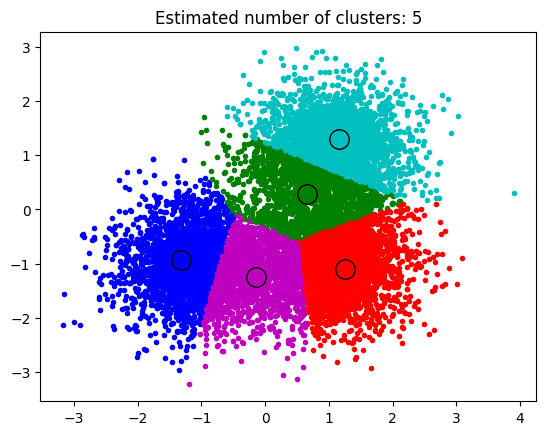

In [6]:
# #############################################################################
# Compute clustering with kmeans
k= 5 #3 #2
kmeans = KMeans(n_clusters=k, n_init="auto").fit(X)
labels_KM = kmeans.labels_
 
cluster_centers_KM = kmeans.cluster_centers_
 
labels_unique_KM = np.unique(labels_KM)
n_clusters_KM = len(labels_unique_KM)

print("number of estimated clusters : %d" % n_clusters_KM) 

plot_cluster(X, n_clusters_KM, labels_KM, cluster_centers_KM)

## <font color='green'><b> Mean-Shift</b></font>

Mean-Shift requires to fix the bandwidth, that is linked with the window size used during the clustering loop.

The best practise is to estimate it with the function 'estimate_bandwidth', where however we have to fix 'quantile', in the range [0-1], the smaller it is the smaller the bandwidth is

0.6849468007397221
number of estimated clusters : 4


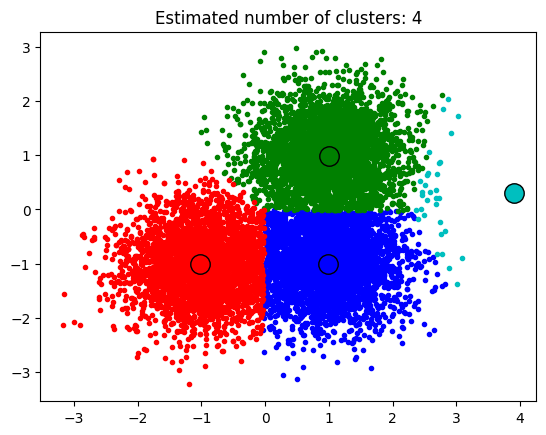

In [7]:
# #############################################################################
# Compute clustering with MeanShift
bandwidth = estimate_bandwidth(X, quantile= 0.1,  n_samples=500)
print(bandwidth)
ms = MeanShift(bandwidth = bandwidth, bin_seeding=True) #bin_seeding set to True speed up the algorithm
ms.fit(X)
labels_MS = ms.labels_
cluster_centers_MS = ms.cluster_centers_

labels_unique_MS = np.unique(labels_MS)
n_clusters_MS= len(labels_unique_MS)

print("number of estimated clusters : %d" % n_clusters_MS) 

plot_cluster(X, n_clusters_MS, labels_MS, cluster_centers_MS)

### <font color='green'><b>EXERCISE 1: </b></font>
 
Modify the number of clusters in kmeans and the bandwidth in meanshift and compare the results

## <font color='green'><b> K-means on Images</b></font> 

image_array shape: (62500, 3)
labels dimensions: (62500,)
cluster_centers dimensions: (5, 3)
clustered_image dimensions: (250, 250, 3)


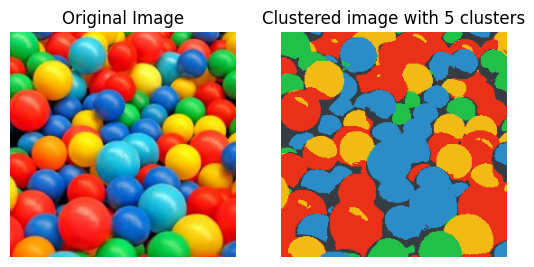

In [8]:
# Load the RGB image
img = imread(img_dir + 'balls1.jpg') # 'pepper.jpg')  #'horses.jpg') # 'balls1.jpg')
 
# Reshape the image into an RGB pixel matrix
w, h, c = img.shape
 
image_array = img.reshape((-1,3))
print(f'image_array shape: {image_array.shape}')

# Shuffle the pixels (useful for more stable results)
image_array_sample = shuffle(image_array, random_state=0)

# Create a KMeans object
n_colors = 5  # Specify the desired number of clusters
kmeans = KMeans(n_clusters=n_colors, n_init='auto')

# Perform clustering on the image pixels
kmeans.fit(image_array_sample)

# Extract cluster labels for each pixel
labels = kmeans.predict(image_array)
labels_unique =  np.unique(labels)
print(f'labels dimensions: {labels.shape}')

# Extract cluster centroids
cluster_centers = kmeans.cluster_centers_.astype(np.uint8)
print(f'cluster_centers dimensions: {cluster_centers.shape}') 

# Create an image with the colors of the centroids
clustered_image = cluster_centers[labels].reshape(w, h, c)
print(f'clustered_image dimensions: {clustered_image.shape}') 

# Display the original image and the compressed image
plt.figure()
plt.subplot(1,2,1) 
plt.axis('off')
plt.title('Original Image')
plt.imshow(img)


plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(clustered_image)
plt.title( f'Clustered image with {len(labels_unique)} clusters');


## <font color='green'><b> Mean-shift on Images</b></font> 
  
Use the mean shift to cluster the rgb colors of an image

image_array shape: (62500, 3)
Bandwidth: 64.74286680307286
Number of estimated clusters : 5


Text(0.5, 1.0, 'Mean-shift cluster with 5 clusters')

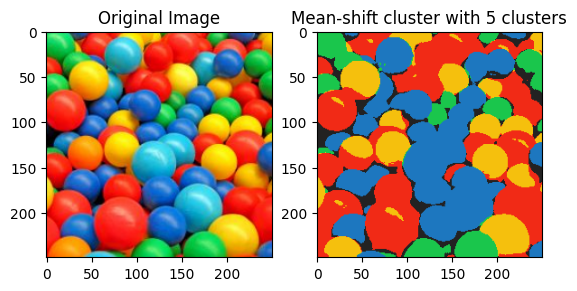

In [9]:
# load an example image 
img = imread(img_dir + 'balls1.jpg') # 'pepper.jpg')  #'horses.jpg') #'balls1.jpg'
w,h,c = img.shape
image_array = img.reshape((-1,3))
print(f'image_array shape: {image_array.shape}')

# convert to np.float32
image_array = np.float32(image_array)

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using==> critic parameter: "quantile"
bandwidth = estimate_bandwidth(image_array,quantile=0.1,  n_samples=500)
print(f'Bandwidth: {bandwidth}')

ms = MeanShift(bandwidth = bandwidth,  bin_seeding=True)
ms.fit(image_array)

labels = ms.labels_
cluster_centers = ms.cluster_centers_.astype(np.uint8)

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print(f"Number of estimated clusters : {n_clusters_}") 
# Now convert back, and make original image
res = cluster_centers[labels].reshape(w, h,c)
 
plt.subplot(121)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(122)
plt.imshow(res )
plt.title(f'Mean-shift cluster with {n_clusters_} clusters')

### <font color='green'><b>EXERCISE 2: </b></font>
 
Apply the K-means algorithm, to the 'u' and 'v' features obtained converting the RGB image to CIE-Luv and considering the 'uv' only. 

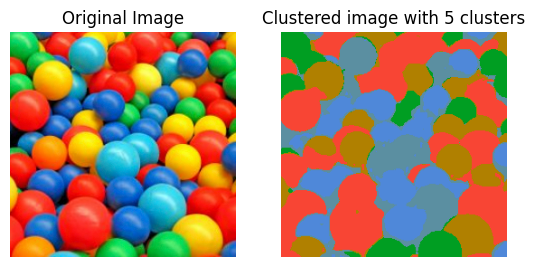

In [10]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Convert the RGB image to Luv
imgLuv = cv2.cvtColor(img, cv2.COLOR_RGB2Luv)

# Reshape the u,v channels into an array of dimensions (h*w, 2), casting the values to float32
uVals = imgLuv[:, :, 1]  # Extract the u channel
vVals = imgLuv[:, :, 2]  # Extract the v channel
uvArray = np.column_stack((uVals.flatten(), vVals.flatten())).astype('float32')

# Create a KMeans object to detect n_colors clusters
n_colors = 5  # Specify the desired number of clusters
kmeans = KMeans(n_clusters=n_colors, n_init='auto')

# Perform clustering on the image pixels
kmeans.fit(uvArray)

# Extract cluster centroids
cluster_centers = kmeans.cluster_centers_.astype(np.uint8)

# Labels
labels = kmeans.predict(uvArray)

# Using the labels and centroids, construct the image of shape (h,w,2)
# where at each pixel is associated the found cluster centroid
cluster_image_uv = cluster_centers[labels].reshape(img.shape[0], img.shape[1], 2)

# Create a blank Luv image
cluster_image = np.zeros_like(imgLuv)
cluster_image[:, :, 1:] = cluster_image_uv

# Set the L channel to the mean value
mean_L = np.mean(imgLuv[:, :, 0])
cluster_image[:, :, 0] = mean_L

# Convert to RGB for visualization
result_image = cv2.cvtColor(cluster_image, cv2.COLOR_Luv2RGB)

plt.figure()
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('Original Image')
plt.imshow(cv2.cvtColor(imgLuv, cv2.COLOR_Luv2RGB))

plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(result_image)
plt.title(f'Clustered image with {n_colors} clusters')

plt.show()


### <font color='green'><b>EXERCISE 3: </b></font>
 
Apply the Mean-shift algorithm, to the 'gray' features only. 

Number of estimated clusters : 5


Text(0.5, 1.0, 'Mean-shift cluster with 5 clusters')

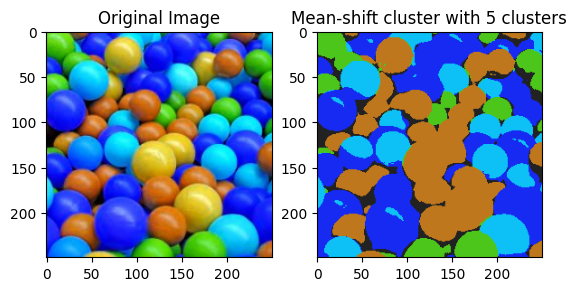

In [27]:
#TO DO

# Load an example image 
img = cv2.imread(img_dir + "balls1.jpg")
#plt.imshow(img)

# Convert to gray levels and reshape to (h*w,1)
w, h ,c = img.shape
imgGray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
image_array = img.reshape((-1,3))
#print(image_array)

# Compute clustering with MeanShift (adopting the function estimate_bandwidth to automatically estimate the bandwidth)
bandwidth = estimate_bandwidth(image_array,quantile=0.1,  n_samples=500)
#print(f'Bandwidth: {bandwidth}')

ms = MeanShift(bandwidth = bandwidth,  bin_seeding=True)
ms.fit(image_array)

labels = ms.labels_
cluster_centers = ms.cluster_centers_.astype(np.uint8)

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print(f"Number of estimated clusters : {n_clusters_}") 
# Now convert back, and make original image
res = cluster_centers[labels].reshape(w, h, c)

# Now convert back, and make original image
plt.subplot(121)
plt.imshow(img)
plt.title('Original Image')

# Convert back, and plot the clustered image
plt.subplot(122)
plt.imshow(res )
plt.title(f'Mean-shift cluster with {n_clusters_} clusters')
 

### <font color='green'><b>EXERCISE 4: </b></font>

Using one of these images 'horse.jpg', 'bebe.jpg', 'cigno.jpg', 'Fiore.jpg'

* [GIVEN] Binarize the image (k=2) , an then:

* [GIVEN] Color differently every connected region (using `measure.label` in the skimage library) 

* [TO DO] Choose the largest region (HINT: use the function: `measure.regionprops`) https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops)

* [TO DO] Put the background to black

### <font color='green'><b>Binarization: </b></font>


(324960, 2)


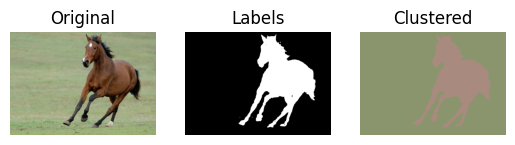

In [12]:
#GIVEN
# compute the k-mean (k=2) on the uv channels, 

img =  imread(img_dir +  'horse.jpg')

w,h,d = img.shape
LuvImg = rgb2luv(img)
image_array = LuvImg[:, :, 1:3].reshape(-1, 2)
 
print(image_array.shape) #CHECK POINT. we should have: (h*w , 2)
image_array = np.float32(image_array); #cast 'z' to float with 32 bit 

image_array_sample = shuffle(image_array, random_state=0)

# Create a KMeans object
n_colors = 2  # Specify the desired number of clusters
kmeans = KMeans(n_clusters=n_colors, n_init='auto')

# Perform clustering on the image pixels
kmeans.fit(image_array_sample)

# Extract cluster labels for each pixel
labels = kmeans.predict(image_array)
labels2d = labels.reshape(w,h) 
#plt.hist(labels2d.flatten(), bins=100, range=(0, 1)) #CHECK POINT

# Extract cluster centroids
cluster_centers = kmeans.cluster_centers_  

# Now convert back into uint8, and make original image
res = cluster_centers[labels]
res2 = res.reshape((w,h,2)) #here we have the u and v values for each pixel

#convert to a Luv first, and then to RGB for visualization
outLuv  = np.zeros_like(img, dtype=float)
outLuv [:,:,0]= np.mean(LuvImg[:,:,0])
outLuv[:, :, 1:3] = res2

outRGB = luv2rgb(outLuv) 
 

plt.subplot(131)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

plt.subplot(132)
plt.imshow(labels2d, cmap='gray');
plt.title('Labels')
plt.axis('off')

plt.subplot(133)
plt.imshow(outRGB)
plt.title('Clustered')
plt.axis('off');

### <font color='green'><b>Connected regions: </b></font>


Num connected regions: 4


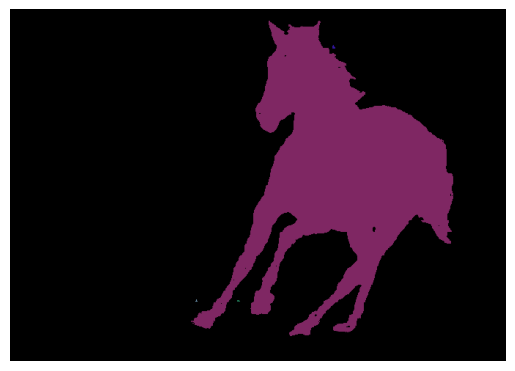

In [55]:
#GIVEN
 
from skimage import color, measure
 
h,w =  labels2d.shape
result_mask = labels2d.astype(bool) 

# labeling of connected regions 
labeled_image, num_labels = measure.label(result_mask, connectivity=2, return_num=True)
print(f"Num connected regions: {num_labels}")


# Create a color palette to label each region.
label_colors = np.random.randint(0, 256, size=(num_labels, 3))

# Create a color-coded image based on the labels
colored_image = np.zeros((h,w,3), dtype=np.uint8)
for label in range(1, num_labels + 1):
    colored_image[labeled_image == label] = label_colors[label - 1]

# Show the color-coded image
plt.imshow(colored_image)
plt.axis('off')
plt.show()


### <font color='green'><b>[TO DO] Find Largest region </b></font>


In [42]:
#TO DO (using the function: measure.regionprops)
# https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops

def find_largest_area(labeled_image): 
    proprieties = measure.regionprops(labeled_image)
    max = 0
    areaMax= None
    for p in proprieties:
        if p.area > max:
            max = p.area
            areaMax = p
    
    return areaMax


maxRegion = find_largest_area(labeled_image)
print("The largest region has an area of", maxRegion.area, "pixels.")


The largest region has an area of 61339.0 pixels.


### <font color='green'><b>[TO DO] Background to BLACK(maintain largest region only)</b></font>

In [ ]:
#TO DO

### <font color='green'><b> Morphology  (to regularize the shape)</b></font> 
Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is our original image, second one is called **structuring element** or **kernel** which decides the nature of operation. Two basic morphological operators are **Erosion** `cv2.erode()` and **Dilation** `cv2.dilate()`. Then variant forms are **Opening**, **Closing** (`cv2.morphologyEx()`), Gradient etc.

 https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

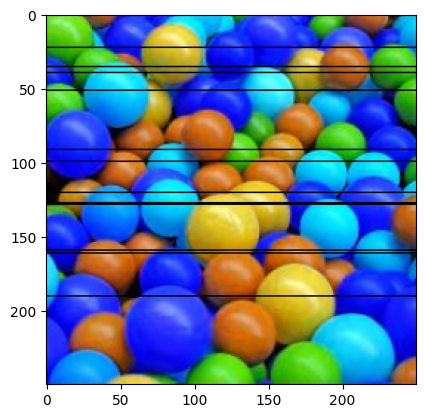

In [56]:
# Define the kernel
kernel = np.ones((11,11), np.uint8)
maxRegion = find_largest_area(labeled_image)

#plt.imshow(maxRegion.image)

image = img_as_ubyte(maxRegion.image)

# Apply the closing
closed_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
binary_image = closed_image.astype(bool)
 
img_foreground = img.copy()
img_foreground[colored_image] = 0
 
plt.imshow(img_foreground)

### <font color='green'><b>EXERCISE 5: </b></font>

Using one of these images 'horse.jpg', 'bebe.jpg', 'cigno.jpg', 'Fiore.jpg'
and exploiting the binarized image:

* Draw the longest contour (HINT: to find the contours use the function `cv2.findContours`, and to measure their length use the f. `cv2.arcLength`)
* Crop the image around the image with the longest contour

### <font color='green'><b>Contours: </b></font>

In [96]:
#TO DO

def find_longest_contour(contours):
    max = 0
    contour = None
    #print(len(contours))
    for c in contours:
        #print(c)
        lenght = cv2.arcLength(c,True)
        if lenght > max:
            max = lenght
            contour = c
    return contour


### <font color='green'><b>Crop: </b></font>


2310


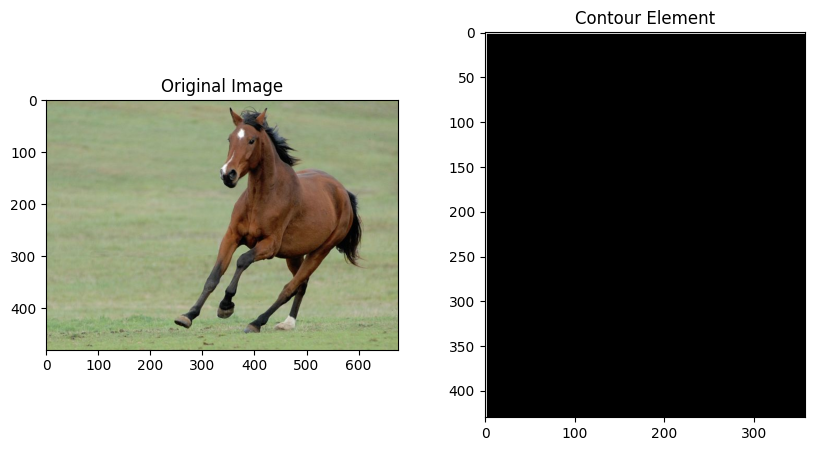

In [116]:
#TO DO
img = plt.imread(img_dir + "horse.jpg")
#plt.imshow(img)
w,h,d = img.shape
LuvImg = rgb2luv(img)
image_array = LuvImg[:, :, 1:3].reshape(-1, 2)
 
#print(image_array.shape) #CHECK POINT. we should have: (h*w , 2)
image_array = np.float32(image_array); #cast 'z' to float with 32 bit 

image_array_sample = shuffle(image_array, random_state=0)

# Create a KMeans object
n_colors = 2  # Specify the desired number of clusters
kmeans = KMeans(n_clusters=n_colors, n_init='auto')

# Perform clustering on the image pixels
kmeans.fit(image_array_sample)

# Extract cluster labels for each pixel
labels = kmeans.predict(image_array)
labels2d = labels.reshape(w,h) 
#plt.hist(labels2d.flatten(), bins=100, range=(0, 1)) #CHECK POINT

# Extract cluster centroids
cluster_centers = kmeans.cluster_centers_  

# Now convert back into uint8, and make original image
res = cluster_centers[labels]
res2 = res.reshape((w,h,2)) #here we have the u and v values for each pixel

#convert to a Luv first, and then to RGB for visualization
outLuv  = np.zeros_like(img, dtype=float)
outLuv [:,:,0]= np.mean(LuvImg[:,:,0])
outLuv[:, :, 1:3] = res2

binarized = img_as_ubyte(luv2rgb(outLuv))
#plt.imshow(binarized) 
gray_image = cv2.cvtColor(binarized, cv2.COLOR_RGB2GRAY)
gray_image_8u = gray_image.astype('uint8')


contours, _ = cv2.findContours(gray_image_8u,1,1)
#print(contours)
longest_contour = find_longest_contour(contours)
print(len(longest_contour))

contour_image = np.zeros_like(image)

# Draw the chosen contour on the blank image
cv2.drawContours(contour_image, [longest_contour], -1, (255, 0, 0), thickness=2)  # Use the color (0, 255, 0) and thickness as needed

# Display the original image and the contour element using Matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Contour Element')

plt.show()


